In [2]:
import os
import numpy as np
import random
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Creating envirenment grid

In [3]:
env = np.zeros([50,50,3], dtype = np.uint8)


def getCoordinates(x1, x2, delta = 10):
    """Gets coordinates for agent in a grid environment"""
    return x1*delta, (x1+1)*delta, x2*delta, (x2+1)*delta

def getNeighbors(a,b, amax = 5, bmax = 5):
    """Gets positions(indexes) of neighbors with corner filtering"""
    neighbors = [(a-1,b-1), (a-1,b), (a-1,b+1), (a,b-1), 
                 (a,b), (a,b+1), (a+1,b-1), (a+1,b), (a+1,b+1)]
    neighbors = [(n1,n2) for n1,n2 in neighbors if n1 >= 0 and n2 >= 0] # eliminate negative index
    neighbors = [(n1,n2) for n1,n2 in neighbors if n1 < amax and n2 < bmax] # eliminate out of range
    return neighbors

def setColor(env, x1, x2, RGB):
    a,b,c,d = getCoordinates(x1,x2)
    env[a:b,c:d] = RGB
    plt.imshow(env)
    
def drawBoard(environment, iteration = 0, threshold = 100, display = True):
    N1, N2, population = environment.N1, environment.N2, environment.population
    env = np.zeros([10*N1, 10*N2, 3], dtype = np.uint8)
    
    for x1 in range(N1):
        for x2 in range(N2):
            setColor(env, x1, x2, population[(x1,x2)].RGB)
    plt.title(f'iter {iteration}')
    if display: plt.imshow(env)
    cd = os.getcwd()
    plt.imsave(os.path.join(cd,'grids', f'iteration{iteration}.png'), env)


In [4]:
class Agent:
    
    def __init__(self, x1, x2, N1 = 5, N2 = 5):
        self.x1, self.x2 = x1, x2
        self.N1, self.N2 = N1, N2
        self.RGB = np. random.choice(255, 3)
        
    def similar(self, other_agent, similarity_threshold = 30):
        """ Checks if agents are similar"""
        def distance(v = self.RGB, w = other_agent.RGB):
            """Calculates difference in Culture(RGB) values"""
            return np.mean(np.abs(v-w)) # Mean of all 3 distances
        return distance() < similarity_threshold
    
    def immitate(self, other_agent):
        """Immitates agents' interaction and changes their Culture(RGB)"""
        i = np.random.choice(3) # [0,1,2]
        self.RGB[i] = other_agent.RGB[i]
        
    def selectOneNeighbor(self):
        neighbors = getNeighbors(self.x1, self.x2, self.N1, self.N2)
        return random.choice(neighbors)

In [5]:
class CultureModel:
    
    def __init__(self, N1, N2):
        self.N1, self.N2 = N1, N2
        self.population = {
            (x1, x2): Agent(x1, x2, N1, N2)
            for x1 in range(self.N1) for x2 in range(self.N2)
        }
        
    def selectOneAgent(self):
        return random.choice(list(self.population.keys()))
    
    def step(self, similarity_threshold = 50):
        A_index = self.selectOneAgent()
        A = self.population[A_index]
        
        B_index = A.selectOneNeighbor()
        B = self.population[B_index]
        
        if A.similar(B, similarity_threshold):
            A.immitate(B)
            
    def runSimulation(self, steps, similarity_threshold = 50):
        for i in range(steps):
            self.step(similarity_threshold)

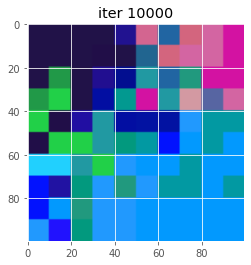

In [9]:
world = CultureModel(N1=10, N2=10)
steps = 10000
similarity_threshold=255
world.runSimulation(steps, similarity_threshold)
drawBoard(world, steps, similarity_threshold)
